In [1]:
import sys
import os

# Add parent directory (project root) to Python path
sys.path.append(os.path.abspath(".."))

# Now your other imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from scripts.preprocess import preprocess_numeric, preprocess_categorical, preprocess_text



In [2]:
# 1. Load Dataset
# --------------------------
df = pd.read_csv('../data/strong_marketing_campaign.csv')

df.head()

,CustomerID,Age,Gender,Income,Location,DeviceType,PreferredCategory,PastClicks,PastPurchases,CustomerLifetimeValue,OpenRate,ClickThroughRate,PreviousResponse,Channel,CampaignType,CampaignText,DayOfWeek,TimeOfDay,Response
0,1,56,Male,82461,Rural,Mobile,Fashion,14,0,4299.93,0.78,0.93,2,Push,Discount,Summer collection now available,Thu,Afternoon,1
1,2,46,Male,22665,Rural,Mobile,Fashion,18,4,4322.29,0.22,0.57,4,Email,New Product Launch,Trending now: Shop the latest collection,Mon,Morning,1
2,3,32,Female,47025,Rural,Mobile,Electronics,8,4,4946.99,0.21,0.74,3,Push,Flash Sale,Exclusive deal: Free shipping now,Fri,Evening,1
3,4,60,Female,43533,Suburban,Desktop,Electronics,16,5,1283.72,0.61,0.80,3,Social,Discount,Your loyalty reward: 15% extra off,Wed,Morning,1
4,5,25,Female,65897,Rural,Mobile,Electronics,14,7,268.84,0.44,0.11,1,SMS,Flash Sale,Don’t miss out on this deal,Mon,Morning,1


In [3]:
# 2. Basic Info
# --------------------------
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Income                 10000 non-null  int64  
 4   Location               10000 non-null  object 
 5   DeviceType             10000 non-null  object 
 6   PreferredCategory      10000 non-null  object 
 7   PastClicks             10000 non-null  int64  
 8   PastPurchases          10000 non-null  int64  
 9   CustomerLifetimeValue  10000 non-null  float64
 10  OpenRate               10000 non-null  float64
 11  ClickThroughRate       10000 non-null  float64
 12  PreviousResponse       10000 non-null  int64  
 13  Channel                10000 non-null  object 
 14  CampaignType           10000 non-null  object 
 15  Cam

CustomerID               0
Age                      0
Gender                   0
Income                   0
Location                 0
DeviceType               0
PreferredCategory        0
PastClicks               0
PastPurchases            0
CustomerLifetimeValue    0
OpenRate                 0
ClickThroughRate         0
PreviousResponse         0
Channel                  0
CampaignType             0
CampaignText             0
DayOfWeek                0
TimeOfDay                0
Response                 0
dtype: int64

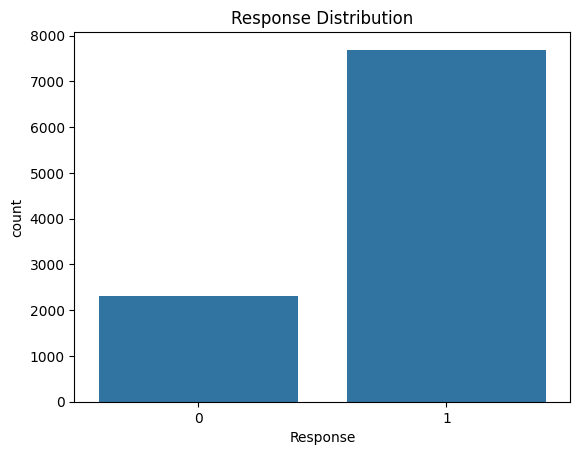

In [4]:
# 3. Target Distribution
# --------------------------
sns.countplot(x='Response', data=df)
plt.title('Response Distribution')
plt.show()

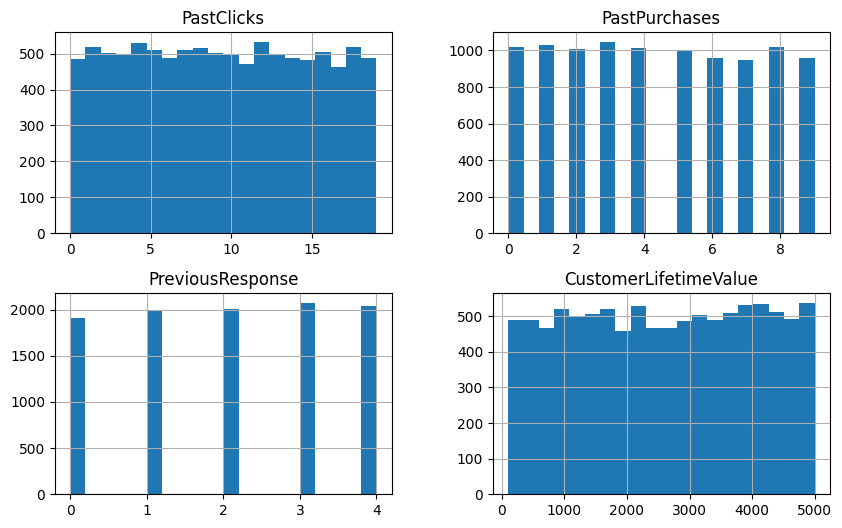

In [5]:
# 4. Numeric Feature Analysis
# --------------------------
numeric_features = ["PastClicks", "PastPurchases", "PreviousResponse", "CustomerLifetimeValue"]
df[numeric_features].hist(bins=20, figsize=(10,6))
plt.show()

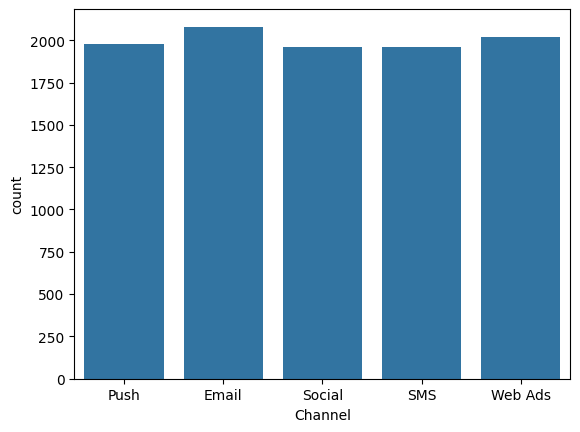

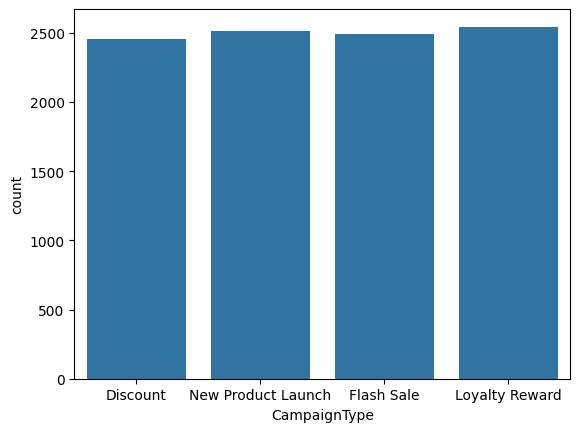

In [6]:
# 5. Categorical Feature Analysis
# --------------------------
categorical_features = ["Channel", "CampaignType"]
for col in categorical_features:
    sns.countplot(x=col, data=df)
    plt.show()

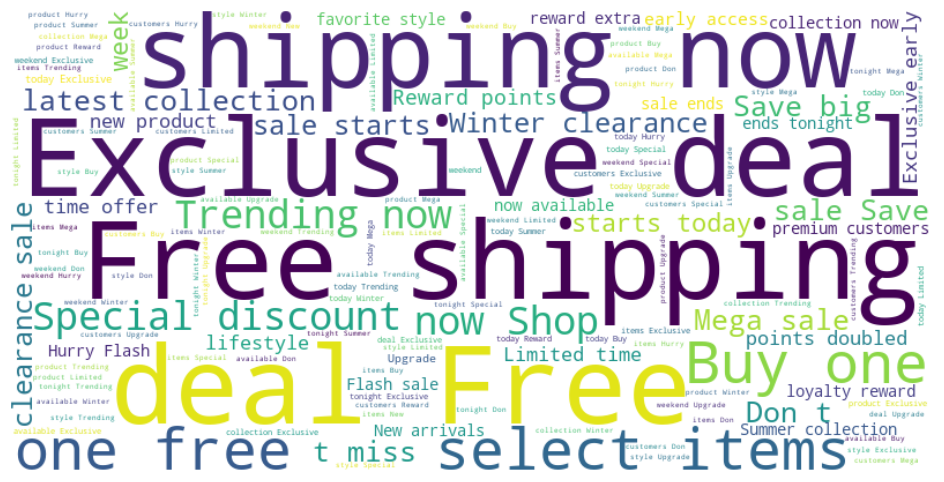

In [7]:
# 6. Text Feature Exploration
# --------------------------
text_feature = "CampaignText"
df[text_feature].head()

# Optional: Word cloud for campaign text
from wordcloud import WordCloud
text = " ".join(df[text_feature])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
import sklearn
print(sklearn.__version__)


1.7.2


In [21]:
from sklearn.preprocessing import OneHotEncoder
help(OneHotEncoder)


Help on class OneHotEncoder in module sklearn.preprocessing._encoders:

class OneHotEncoder(_BaseEncoder)
 |  OneHotEncoder(*, categories='auto', drop=None, sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat')
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse_output``
 |  parameter).
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data t

In [8]:
# 7. Preprocessing Preview
# --------------------------
X_num, scaler = preprocess_numeric(df, numeric_features)
# Use 'sparse_output=False' instead of 'sparse=False' for compatibility with newer scikit-learn
X_cat, ohe = preprocess_categorical(df, categorical_features)
X_text, tokenizer = preprocess_text(df, text_feature)

print("Numeric shape:", X_num.shape)
print("Categorical shape:", X_cat.shape)
print("Text shape:", X_text.shape)

Numeric shape: (10000, 4)
Categorical shape: (10000, 9)
Text shape: (10000, 100)
